In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
<p style="20px">
In this notebook, we are going to explore inter-column relations and will ultimately create Features with the potential of influencing dropouts
<br>
Currently, the features that influence dropout rates even in the slightest are
<ul>
<li>daily_study_hours</li>
<li>admission_taken</li>
<li>peer_pressure_level</li>
<p>

In [284]:
jee = pd.read_csv("../Data/JEE_Dropout_After_Class_12.csv",delimiter=',')
jee

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0


In [285]:
jee.isna().sum()

jee_main_score             0
jee_advanced_score         0
mock_test_score_avg        0
school_board               0
class_12_percent           0
attempt_count              0
coaching_institute      1209
daily_study_hours          0
family_income              0
parent_education           0
location_type              0
peer_pressure_level        0
mental_health_issues       0
admission_taken            0
dropout                    0
dtype: int64

In [286]:
jee.describe()

,jee_main_score,jee_advanced_score,mock_test_score_avg,class_12_percent,attempt_count,daily_study_hours,dropout
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,71.961226,65.736404,68.110756,74.957400,1.504600,4.483860,0.207200
std,13.668497,15.909248,11.938849,9.885309,0.500029,1.984723,0.405341
min,26.620000,3.240000,27.490000,50.000000,1.000000,0.000000,0.000000
25%,62.790000,55.017500,60.070000,68.067500,1.000000,3.100000,0.000000
50%,72.190000,65.720000,68.120000,74.940000,2.000000,4.500000,0.000000
75%,81.322500,76.835000,76.110000,81.842500,2.000000,5.900000,0.000000
max,100.000000,100.000000,100.000000,100.000000,2.000000,10.000000,1.000000


In [287]:
lo = pd.concat([jee.head(), jee.tail()], axis=0)
lo

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0
4999,60.13,76.31,66.15,State,94.90,2,FIITJEE,2.1,Mid,12th,Urban,Low,Yes,No,0


In [288]:
x=jee.loc[jee["dropout"]==1]["dropout"].count()
y=jee.loc[jee["dropout"]==0]["dropout"].count()
print(f"Percentage of dropouts: {x/(x+y)*100:.2f}% and Percentage of non-dropouts: {y/(x+y)*100:.2f}%")

Percentage of dropouts: 20.72% and Percentage of non-dropouts: 79.28%


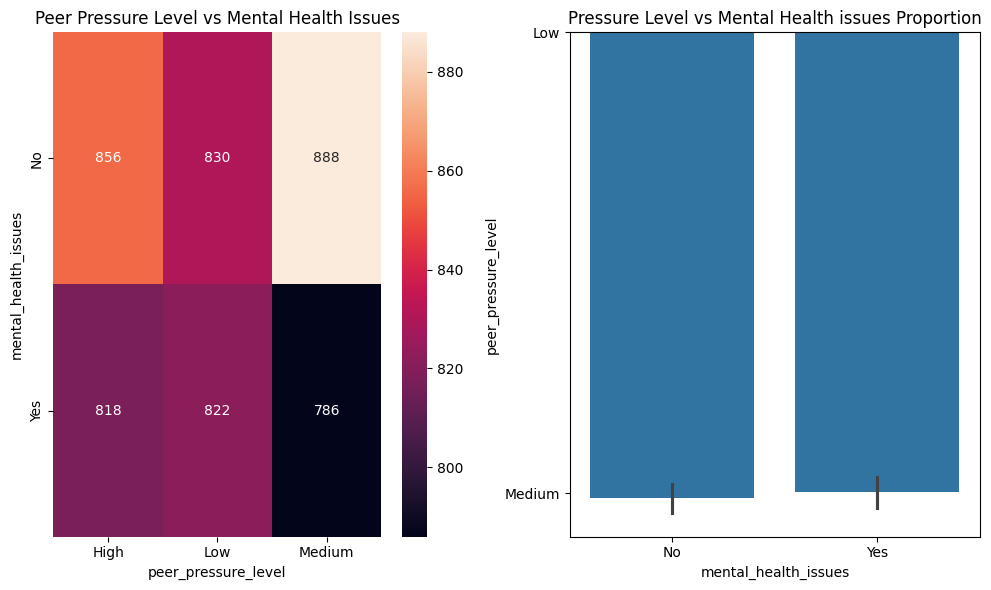

In [289]:
fig,axes= plt.subplots(1,2,figsize=(10,6))

sns.heatmap(pd.crosstab(jee["mental_health_issues"], jee["peer_pressure_level"]),annot=True, fmt='d', ax=axes[0])
axes[0].set_title("Peer Pressure Level vs Mental Health Issues")

sns.barplot(x="mental_health_issues", y="peer_pressure_level", data=jee, ax=axes[1])
axes[1].set_title("Pressure Level vs Mental Health issues Proportion")
plt.tight_layout()
plt.show()

In [290]:
jee_fe = jee[["mental_health_issues", "peer_pressure_level","dropout"]].copy()
jee_fe

,mental_health_issues,peer_pressure_level,dropout
0,No,Low,1
1,Yes,Low,0
2,Yes,Medium,1
3,Yes,Medium,0
4,No,High,0
...,...,...,...
4995,Yes,High,0
4996,Yes,High,0
4997,Yes,Medium,0
4998,No,Low,0


In [291]:
jee_fe["mental_health_issues"] = jee_fe["mental_health_issues"].map({
  "Yes":1,
  "No":0
})

jee_fe["peer_pressure_level"] = jee_fe["peer_pressure_level"].map({
  "Low":0,
  "Medium":1,
  "High":2
})

jee_fe

,mental_health_issues,peer_pressure_level,dropout
0,0,0,1
1,1,0,0
2,1,1,1
3,1,1,0
4,0,2,0
...,...,...,...
4995,1,2,0
4996,1,2,0
4997,1,1,0
4998,0,0,0


In [292]:
jee_fe["peer_focused_mh"] = jee_fe["peer_pressure_level"] * 2 + jee_fe["mental_health_issues"]
jee_fe["mental_health_pp"] = jee_fe["mental_health_issues"] * 2 + jee_fe["peer_pressure_level"]
jee_fe["peer_focused_mh_weighted"] = jee_fe["peer_pressure_level"]* 5 + jee_fe["mental_health_issues"]*2
jee_fe

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted
0,0,0,1,0,0,0
1,1,0,0,1,2,2
2,1,1,1,3,3,7
3,1,1,0,3,3,7
4,0,2,0,4,2,10
...,...,...,...,...,...,...
4995,1,2,0,5,4,12
4996,1,2,0,5,4,12
4997,1,1,0,3,3,7
4998,0,0,0,0,0,0


In [293]:
jee_fe

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted
0,0,0,1,0,0,0
1,1,0,0,1,2,2
2,1,1,1,3,3,7
3,1,1,0,3,3,7
4,0,2,0,4,2,10
...,...,...,...,...,...,...
4995,1,2,0,5,4,12
4996,1,2,0,5,4,12
4997,1,1,0,3,3,7
4998,0,0,0,0,0,0


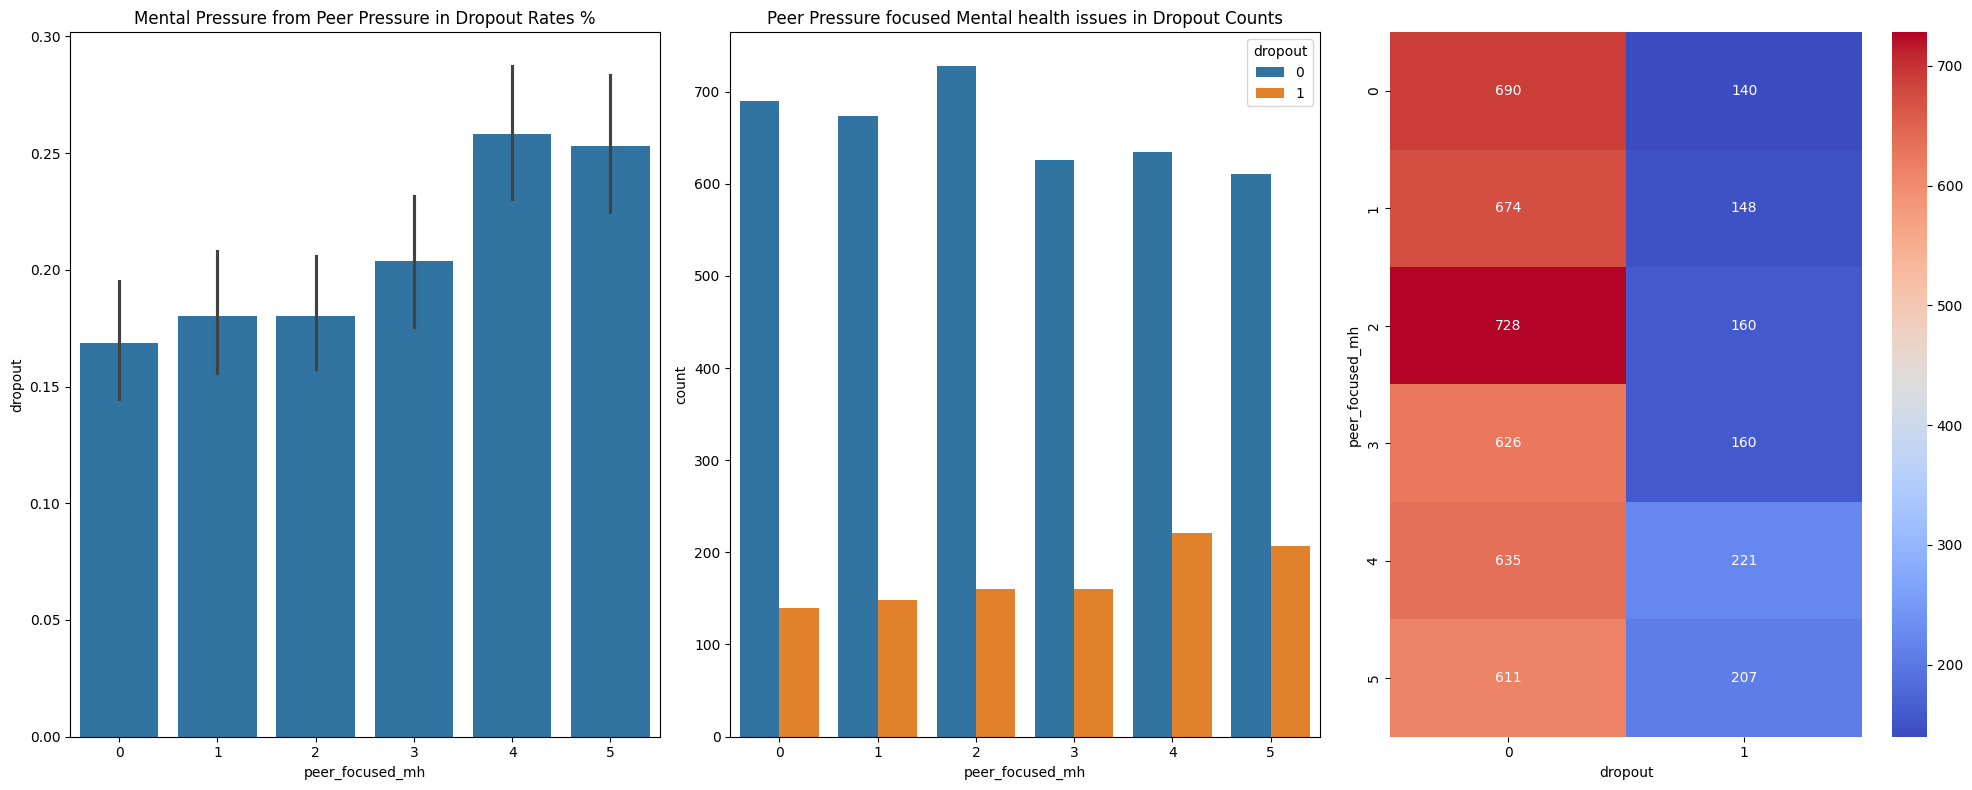

In [294]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x="peer_focused_mh", y="dropout", data=jee_fe, ax=axes[0])
axes[0].set_title("Mental Pressure from Peer Pressure in Dropout Rates %")
sns.countplot(x="peer_focused_mh", hue="dropout", data=jee_fe, ax=axes[1])
axes[1].set_title("Peer Pressure focused Mental health issues in Dropout Counts")
sns.heatmap(pd.crosstab(jee_fe["peer_focused_mh"],jee_fe["dropout"]),annot=True, fmt='d',cmap='coolwarm', ax=axes[2])
plt.tight_layout()
plt.show()

In [295]:
jee_fe[jee_fe["peer_focused_mh"].isin([4,5])][["mental_health_issues","peer_pressure_level","peer_focused_mh"]].sample(4)

,mental_health_issues,peer_pressure_level,peer_focused_mh
2442,0,2,4
3845,1,2,5
1173,1,2,5
2360,1,2,5


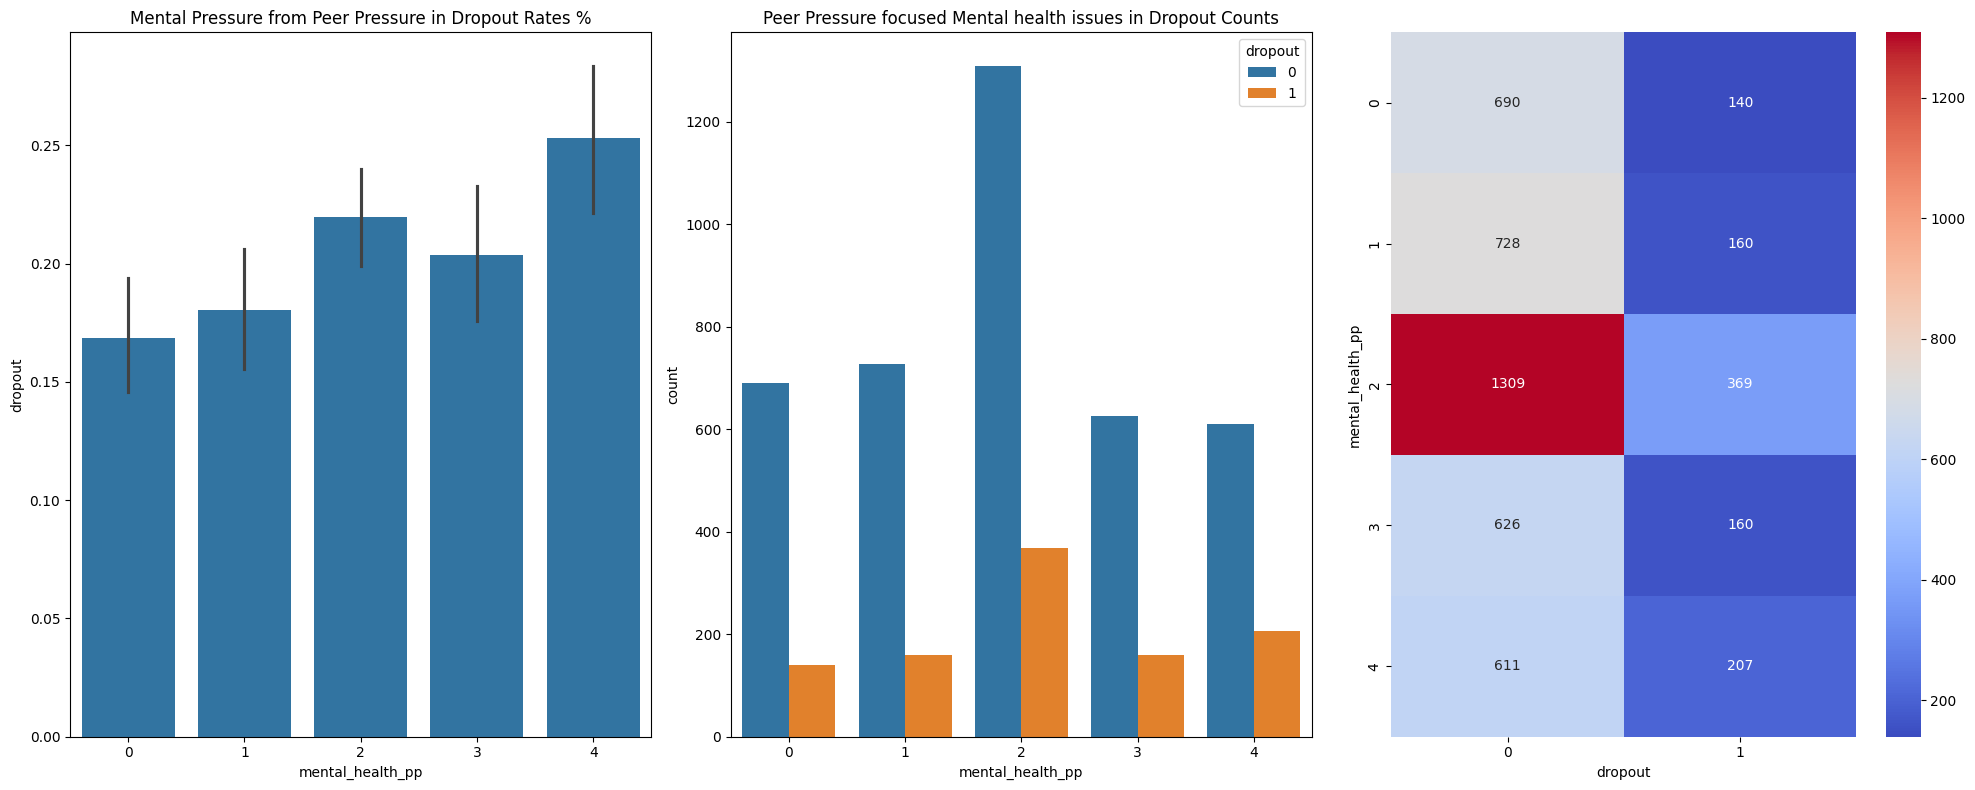

In [296]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x="mental_health_pp", y="dropout", data=jee_fe, ax=axes[0])
axes[0].set_title("Mental Pressure from Peer Pressure in Dropout Rates %")
sns.countplot(x="mental_health_pp", hue="dropout", data=jee_fe, ax=axes[1])
axes[1].set_title("Peer Pressure focused Mental health issues in Dropout Counts")
sns.heatmap(pd.crosstab(jee_fe["mental_health_pp"], jee_fe["dropout"]), annot=True, fmt='d',cmap='coolwarm', ax=axes[2])
plt.tight_layout()
plt.show()

In [297]:
jee_fe[jee_fe["mental_health_pp"].isin([4])][["mental_health_issues","peer_pressure_level","mental_health_pp"]].sample(4)

,mental_health_issues,peer_pressure_level,mental_health_pp
4996,1,2,4
3001,1,2,4
3177,1,2,4
1608,1,2,4


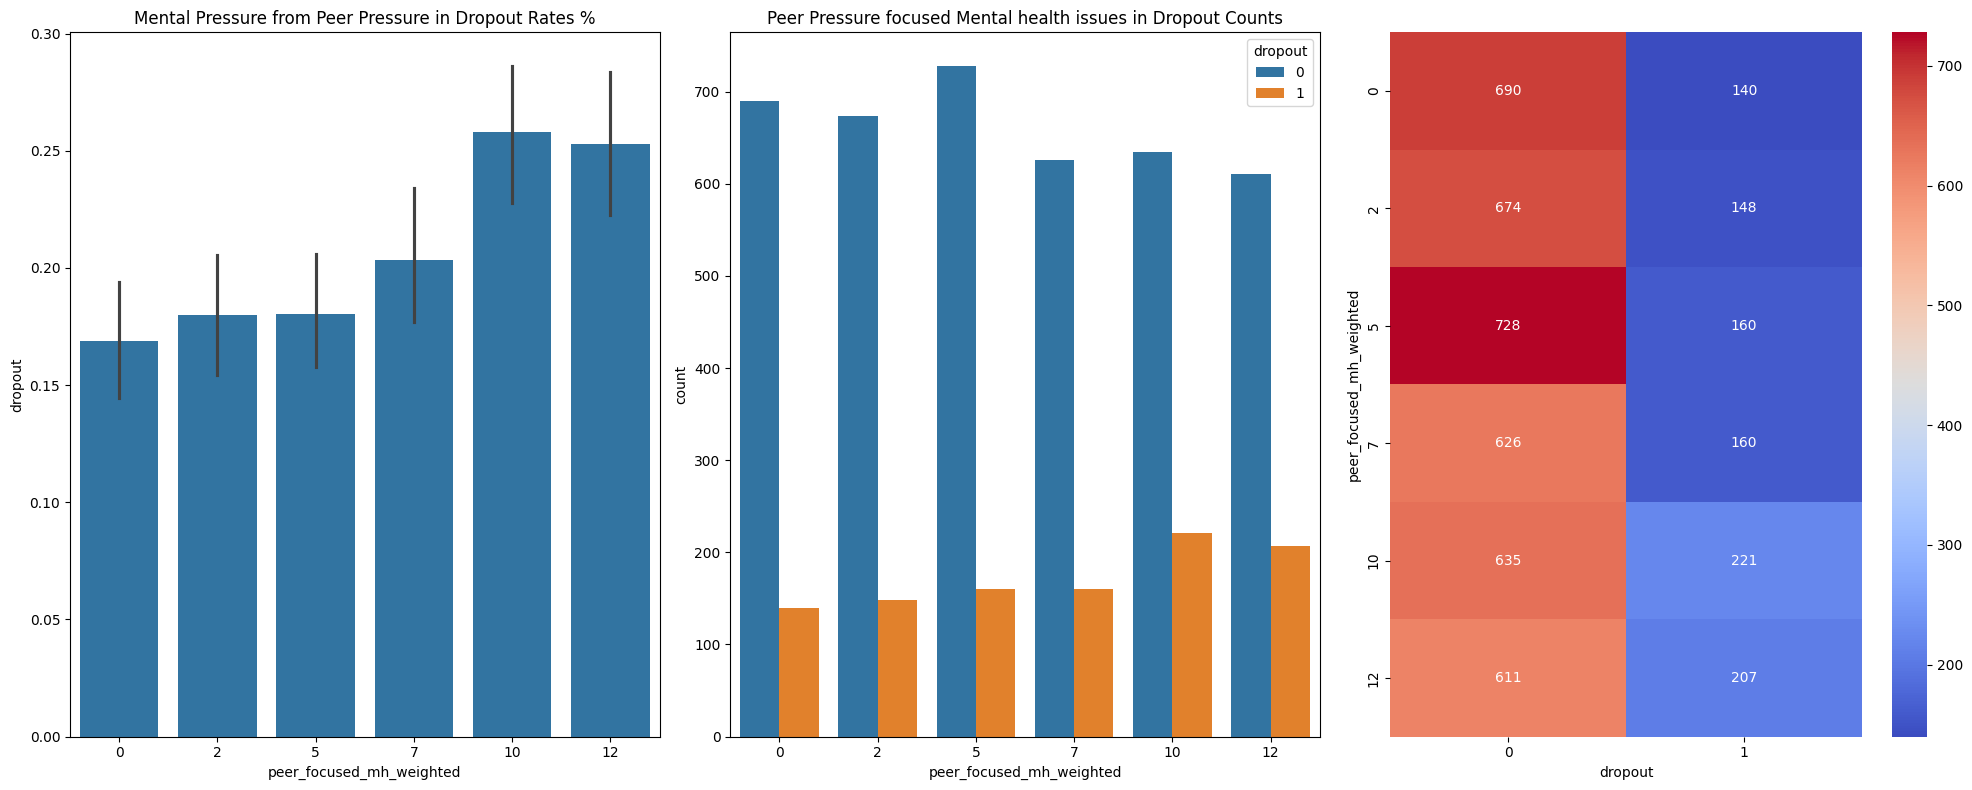

In [298]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
sns.barplot(x="peer_focused_mh_weighted", y="dropout", data=jee_fe, ax=axes[0])
axes[0].set_title("Mental Pressure from Peer Pressure in Dropout Rates %")
sns.countplot(x="peer_focused_mh_weighted", hue="dropout", data=jee_fe, ax=axes[1])
axes[1].set_title("Peer Pressure focused Mental health issues in Dropout Counts")
sns.heatmap(pd.crosstab(jee_fe["peer_focused_mh_weighted"], jee_fe["dropout"]), annot=True, fmt='d',cmap='coolwarm', ax=axes[2])
plt.tight_layout()
plt.show()

<p style="font-size: 20px">
As we can see, we can see a proper trend in <b>peer_focused_mh</b> with <b>mental_health_pp</b> can be counted as a secondary feature for consideration.<br>
Also since <b>peer_focused_mh_weighted</b> has the same trend as <b>peer_focused_mh</b>, it is logical to not include it into the original dataframe.
</p>

## Mock Test and Real test Gap
<p style="font-size:20px">
Since it is not explicitly mentioned that the mock_test_score_avg is for Mains or Advanced, I am going to do a correlation between the three.
</p>

In [299]:
jee[["jee_main_score","jee_advanced_score","mock_test_score_avg"]].corr()

,jee_main_score,jee_advanced_score,mock_test_score_avg
jee_main_score,1.000000,0.000206,-0.003406
jee_advanced_score,0.000206,1.000000,-0.005665
mock_test_score_avg,-0.003406,-0.005665,1.000000


<p style="font-size: 18px">
It seems that neither are correlated with mock_test_score_avg
</p>

## Mock_Main_Gap
<p style="font-size: 20px">
Eitherways, a new column named <b>"Mock_Main_Gap"</b> will be created to see if more gaps between <b>jee_main_score</b> and <b>mock_test_avg</b> correlates with increased <b>mental_health_issues</b> or <b>peer_pressure_level</b> or <b>BOTH</b>
</p>

In [300]:
jee_fe["mock_main_gap"] = jee["jee_main_score"] - jee["mock_test_score_avg"]
jee_fe.head()

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted,mock_main_gap
0,0,0,1,0,0,0,19.09
1,1,0,0,1,2,2,5.73
2,1,1,1,3,3,7,20.24
3,1,1,0,3,3,7,23.99
4,0,2,0,4,2,10,-13.65


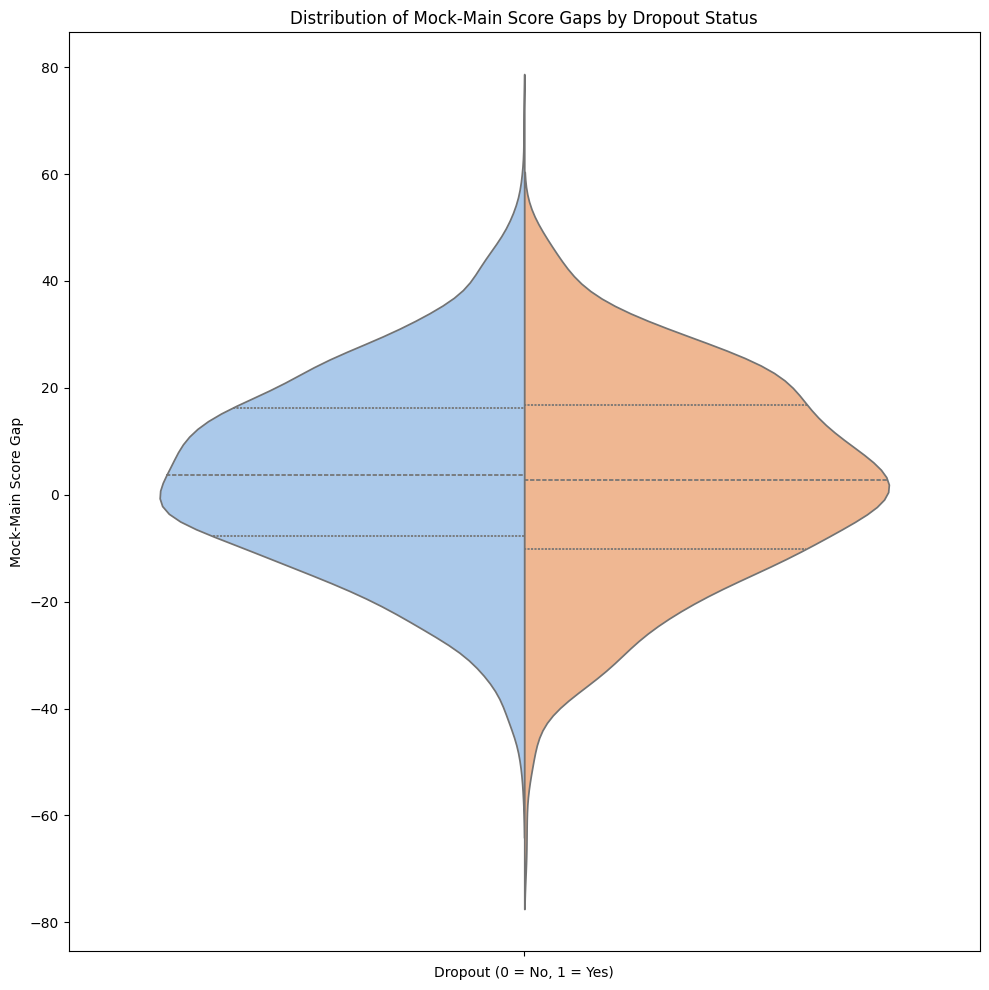

In [301]:
plt.figure(figsize=(10, 10))
sns.violinplot(hue="dropout", y="mock_main_gap", split=True, data=jee_fe, inner="quartile", palette="pastel",legend=False)

plt.title("Distribution of Mock-Main Score Gaps by Dropout Status")
plt.xlabel("Dropout (0 = No, 1 = Yes)")
plt.ylabel("Mock-Main Score Gap")
plt.tight_layout()
plt.show()

<p style="font-size: 20px">
We find that higher the negative difference in <b>jee_main_score</b> and <b>mock_test_score_avg</b>, the student has a higher chance of dropping out.<br>
<b>This can indicate GUESSWORK and/or ACADEMIC PRESSURE</b>
</p>

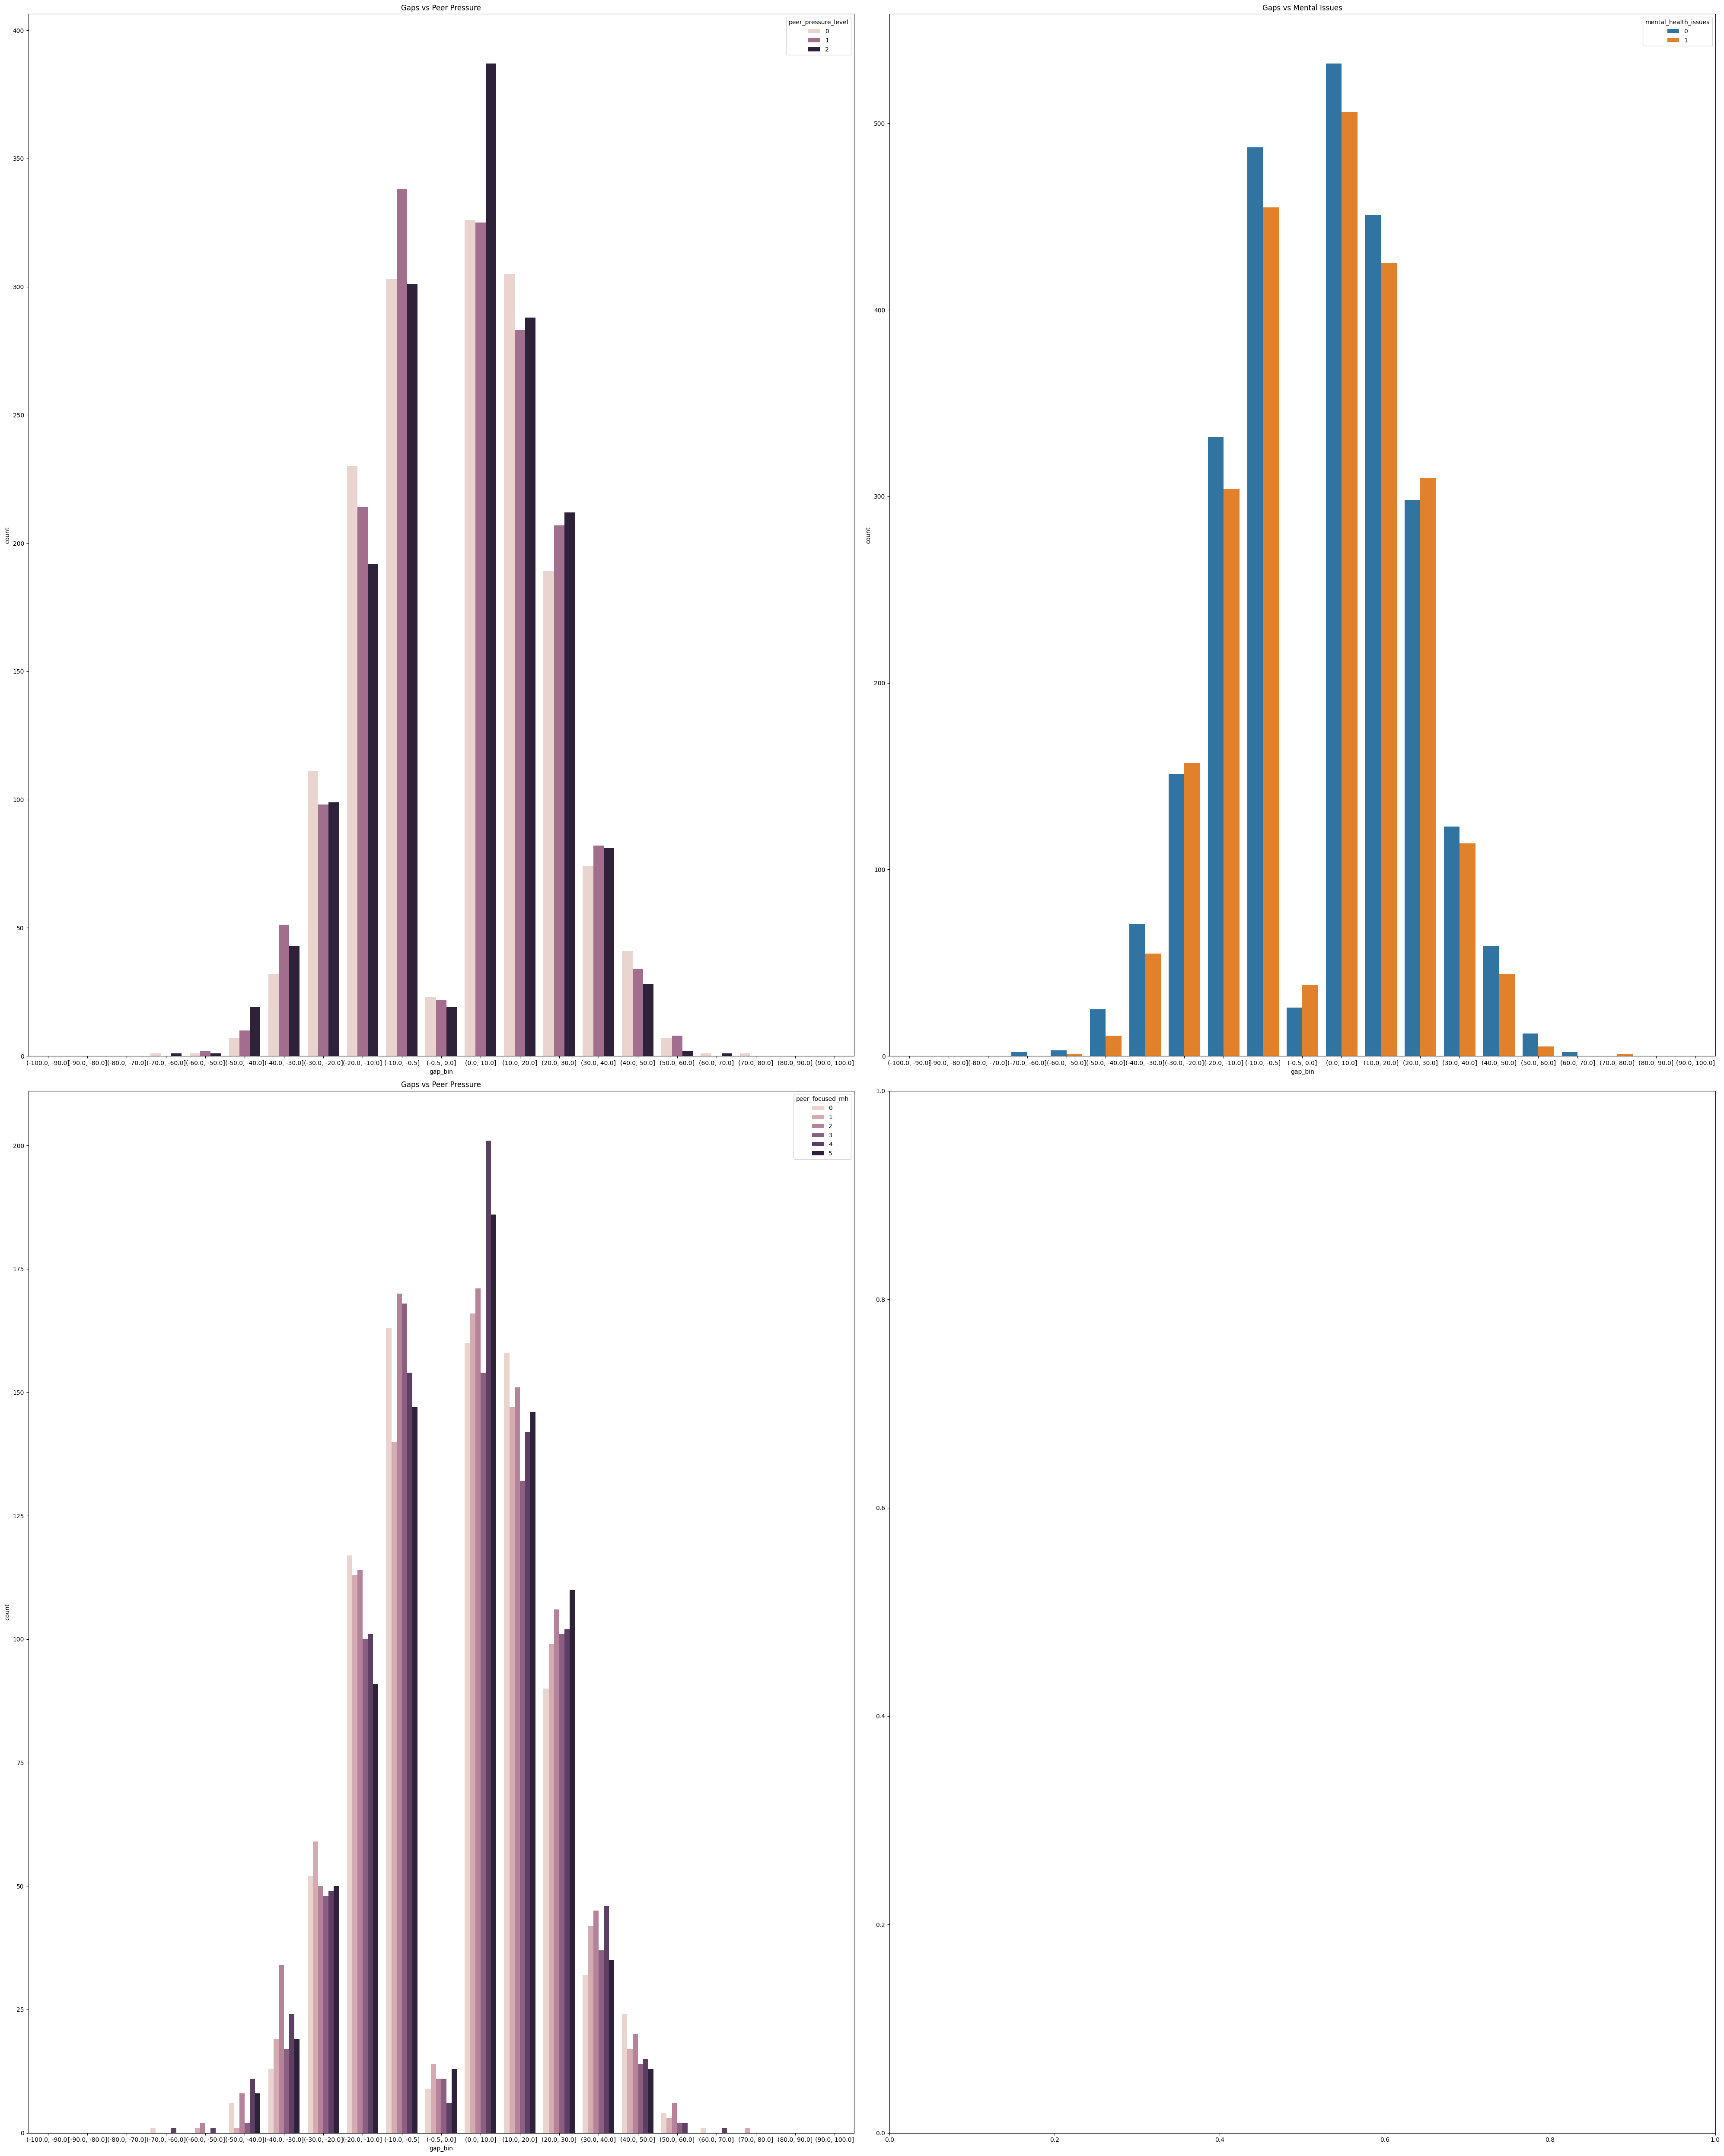

In [302]:
fig, axes = plt.subplots(2,2, figsize=(40,50))
bins = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, -0.5, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
jee_fe["gap_bin"] = pd.cut(jee_fe["mock_main_gap"], bins=bins)
sns.countplot(x="gap_bin", hue="peer_pressure_level",data=jee_fe, ax=axes[0,0])
axes[0,0].set_title("Gaps vs Peer Pressure")
sns.countplot(x="gap_bin", hue="mental_health_issues", data=jee_fe, ax=axes[0,1])
axes[0,1].set_title("Gaps vs Mental Issues")
sns.countplot(x="gap_bin", hue="peer_focused_mh",data=jee_fe, ax=axes[1,0])
axes[1,0].set_title("Gaps vs Peer Pressure")


plt.tight_layout()
plt.show()

In [303]:
import scipy.stats as stats
def cramers_v(confusion_matrix):
  chi2 = stats.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2=chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

target = 'dropout'
for col in jee_fe.columns:
  if col == target:
    continue
  try:
    contingency = pd.crosstab(jee_fe[col],jee_fe[target])
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    cramer_v = cramers_v(contingency)
    print(f"\n Feature: {col}")
    print(f"Chi square p-value: {p}")
    
    if p < 0.05:
      print(f"Statistically significant relationship")
      print(f"Cramer's V: {cramer_v}")
    else:
      print(f"No Significant relationship")
  except Exception as e:
    print(f"Skipping {col} due to error: {e}")



 Feature: mental_health_issues
Chi square p-value: 0.4087327606376472
No Significant relationship

 Feature: peer_pressure_level
Chi square p-value: 7.445029907800258e-09
Statistically significant relationship
Cramer's V: 0.08418803628847978

 Feature: peer_focused_mh
Chi square p-value: 2.153384149834242e-07
Statistically significant relationship
Cramer's V: 0.0827248626710178

 Feature: mental_health_pp
Chi square p-value: 9.477622345963638e-05
Statistically significant relationship
Cramer's V: 0.06266143547178396

 Feature: peer_focused_mh_weighted
Chi square p-value: 2.153384149834242e-07
Statistically significant relationship
Cramer's V: 0.0827248626710178

 Feature: mock_main_gap
Chi square p-value: 0.6094778333673887
No Significant relationship

 Feature: gap_bin
Chi square p-value: 0.0026047540666996293
Statistically significant relationship
Cramer's V: 0.06296848869659148


In [304]:
jee_fe

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted,mock_main_gap,gap_bin
0,0,0,1,0,0,0,19.09,"(10.0, 20.0]"
1,1,0,0,1,2,2,5.73,"(0.0, 10.0]"
2,1,1,1,3,3,7,20.24,"(20.0, 30.0]"
3,1,1,0,3,3,7,23.99,"(20.0, 30.0]"
4,0,2,0,4,2,10,-13.65,"(-20.0, -10.0]"
...,...,...,...,...,...,...,...,...
4995,1,2,0,5,4,12,14.23,"(10.0, 20.0]"
4996,1,2,0,5,4,12,-0.89,"(-10.0, -0.5]"
4997,1,1,0,3,3,7,16.25,"(10.0, 20.0]"
4998,0,0,0,0,0,0,25.92,"(20.0, 30.0]"


In [305]:

jee_t = jee_fe.copy()
jee_t["family_income"] = jee["family_income"]
jee_t["family_income"] = jee_t["family_income"].map({
  "Low":0,
  "Mid":1,
  "High":2
})

<p style="font-size:20px">
Creating a temporary model of Random Forest Classifier to find how much each field influences a decision.
</p>

In [306]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

jee_t["daily_study_hours"] = jee["daily_study_hours"]
features = ["mock_main_gap","peer_focused_mh","daily_study_hours","family_income"]
target = "dropout"

X= jee_t[features]
Y= jee_t[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       804
           1       0.61      0.58      0.59       196

    accuracy                           0.84      1000
   macro avg       0.75      0.74      0.75      1000
weighted avg       0.84      0.84      0.84      1000



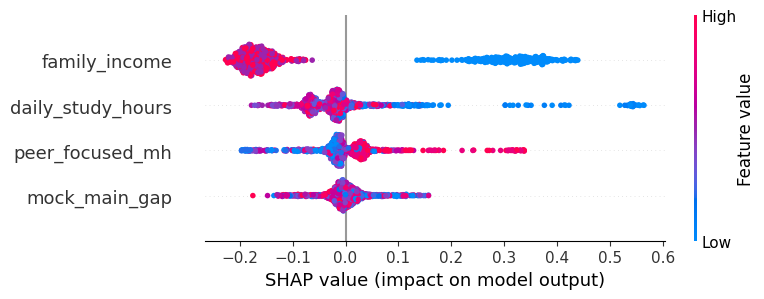

In [307]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # shape: (2, 1000, 2)

# If shap_values is a list (old format)
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)  # class=1 → dropout
else:
    shap.summary_plot(shap_values[..., 1], X_test)  # class=1 last axis

<p style="font-size:17px">
SHAP visualizes how much each features influence the model's decision and we see here the family_income seems to be influence its decisions a lot
</p>

## Income Vs Admission

<p style="font-size:20px">
Since family_income and admission_taken seem to have good control on a student's choice to drop out, it feels logical to merge them together to see if they converge and create a really good deciding feature
</p>

In [308]:
jee_family = jee[["family_income","location_type","parent_education","admission_taken","dropout"]].copy()
jee_family

,family_income,location_type,parent_education,admission_taken,dropout
0,Low,Urban,Upto 10th,No,1
1,Mid,Urban,Upto 10th,No,0
2,Low,Semi-Urban,PG,No,1
3,Low,Semi-Urban,12th,Yes,0
4,Mid,Semi-Urban,Graduate,Yes,0
...,...,...,...,...,...
4995,High,Semi-Urban,PG,Yes,0
4996,Mid,Urban,PG,Yes,0
4997,Mid,Semi-Urban,PG,Yes,0
4998,High,Urban,Upto 10th,Yes,0


In [309]:
jee_family["family_income"].unique()

array(['Low', 'Mid', 'High'], dtype=object)

In [310]:
jee_family["family_income"] = jee_family["family_income"].map({
  'Low': 0,
  'Mid':1,
  'High':2
})

jee_family["location_type"] = jee_family["location_type"].map({
  "Rural":0,
  "Semi-Urban":1,
  "Urban":2
})

jee_family["parent_education"] = jee_family["parent_education"].map({
  "Upto 10th":0,
  "PG":1,
  "12th":2,
  "Graduate":3
})

jee_family["admission_taken"] = jee_family["admission_taken"].map({
  "No":0,
  "Yes":1
})

jee_family.head()

,family_income,location_type,parent_education,admission_taken,dropout
0,0,2,0,0,1
1,1,2,0,0,0
2,0,1,1,0,1
3,0,1,2,1,0
4,1,1,3,1,0


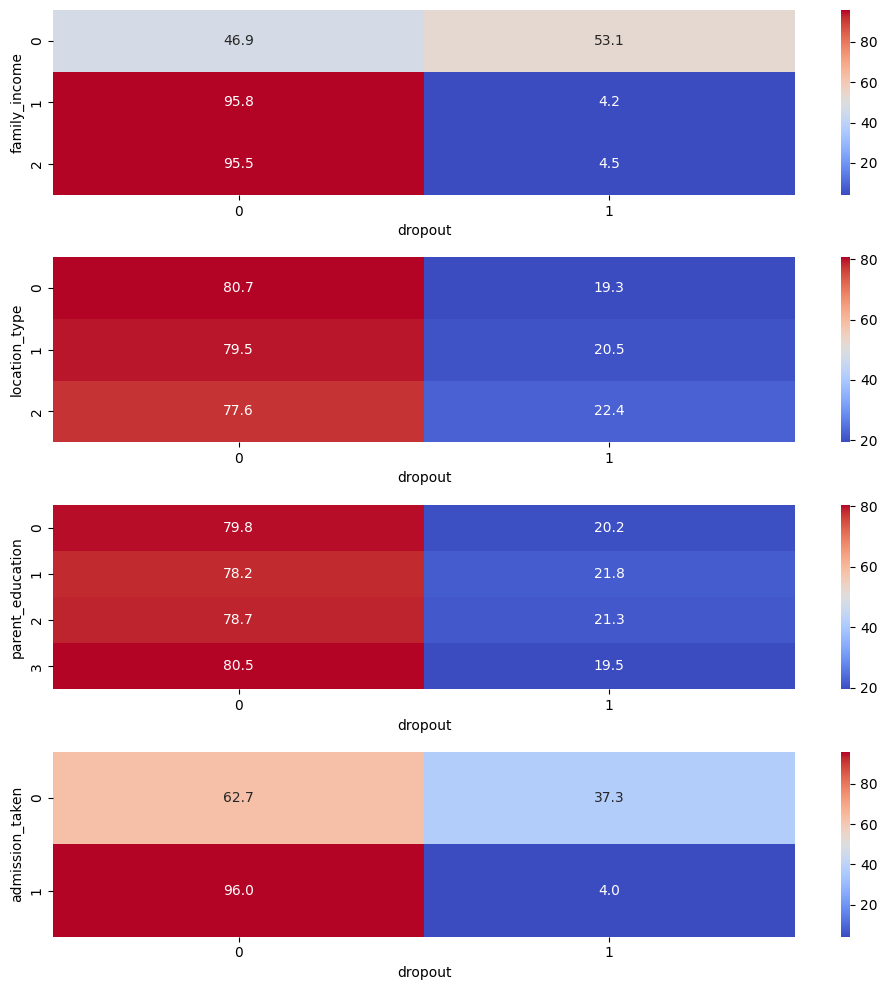

In [311]:
fig, axes = plt.subplots(4,1, figsize=(10,10))

sns.heatmap(pd.crosstab(jee_family["family_income"], jee_family["dropout"], normalize='index')*100, cmap="coolwarm", annot=True, fmt=".1f", ax=axes[0])
sns.heatmap(pd.crosstab(jee_family["location_type"], jee_family["dropout"], normalize='index')*100, cmap="coolwarm", annot=True, fmt=".1f", ax=axes[1])
sns.heatmap(pd.crosstab(jee_family["parent_education"], jee_family["dropout"], normalize='index')*100, cmap="coolwarm", annot=True, fmt=".1f", ax=axes[2])
sns.heatmap(pd.crosstab(jee_family["admission_taken"], jee_family["dropout"], normalize='index')*100, cmap="coolwarm", annot=True, fmt=".1f", ax=axes[3])

plt.tight_layout()
plt.show()


In [312]:
jee_family[(jee_family["family_income"]==0) & (jee_family["admission_taken"]==0)][["dropout"]].sample(5)

,dropout
4094,1
4652,1
534,1
2166,1
2219,1


### Worringly, It seems that **EVERYONE** whose family has low income and has not taken admission in any form have dropped out, which does make sense.

In [313]:
jee_family[(jee_family["family_income"]==1) & (jee_family["admission_taken"]==0)][["dropout"]].sample(5)

,dropout
2398,0
1126,0
2503,0
4262,0
4784,0


In [314]:
jee_family["Income vs Admission"] = jee["family_income"] + "_" + jee["admission_taken"]
jee_family

,family_income,location_type,parent_education,admission_taken,dropout,Income vs Admission
0,0,2,0,0,1,Low_No
1,1,2,0,0,0,Mid_No
2,0,1,1,0,1,Low_No
3,0,1,2,1,0,Low_Yes
4,1,1,3,1,0,Mid_Yes
...,...,...,...,...,...,...
4995,2,1,1,1,0,High_Yes
4996,1,2,1,1,0,Mid_Yes
4997,1,1,1,1,0,Mid_Yes
4998,2,2,0,1,0,High_Yes


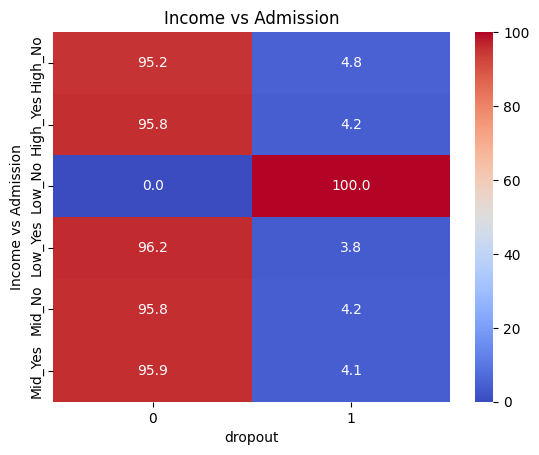

In [315]:
sns.heatmap(pd.crosstab(jee_family["Income vs Admission"], jee_family["dropout"], normalize='index')*100, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Income vs Admission")
plt.show()

In [316]:
x = jee_family[(jee_family["Income vs Admission"] == "Low_No")]["dropout"].count()
y = jee[jee["dropout"]==1]["dropout"].count()
print(f"""
      The number of students who dropped because of 
      low family income and no admission taken = {x} 
      The total number of students who dropped out = {y}
      """)


      The number of students who dropped because of 
      low family income and no admission taken = 861 
      The total number of students who dropped out = 1036
      


### Parental_Support

<p style="font-size">
Since parental support is one of main reasons for support for a student to go through entrance exams combining features of mental health, family and coaching institute.
</p>

In [317]:
jee["Drop_Year_taken"] = jee["attempt_count"].apply(lambda x:1 if x>1 else 0)
jee_family["Drop_Year"] = jee["Drop_Year_taken"].copy()

In [318]:
jee[(jee["peer_pressure_level"].isin(["Medium","High"])) & (jee["family_income"]=="Low")][["peer_pressure_level","family_income","dropout"]].sample(5)

,peer_pressure_level,family_income,dropout
3117,High,Low,0
2218,High,Low,0
4469,Medium,Low,0
3383,Medium,Low,0
524,High,Low,0


In [319]:
jee[(jee["mental_health_issues"]=="Yes") & (jee["family_income"]=="Low")][["mental_health_issues","family_income","dropout"]].sample(5)

,mental_health_issues,family_income,dropout
1181,Yes,Low,0
4797,Yes,Low,0
4949,Yes,Low,1
4175,Yes,Low,1
4039,Yes,Low,0


In [320]:
x = (jee[(jee["mental_health_issues"]=="Yes") & (jee["family_income"]=="Low") & jee["dropout"]==1][["mental_health_issues"]].count()/jee.shape[0])*100
x

mental_health_issues    8.94
dtype: float64

In [321]:
x = (jee[(jee["peer_pressure_level"].isin(["Medium","High"])) & (jee["family_income"]=="Low") & jee["dropout"]==1][["peer_pressure_level"]].count()/jee.shape[0])*100
x

peer_pressure_level    12.26
dtype: float64

In [322]:
x=(jee[jee["dropout"]==1].count())[["dropout"]]/jee.shape[0]*100
x

dropout    20.72
dtype: float64

In [323]:
len_group = len(jee[(jee["peer_pressure_level"].isin(["Medium", "High"])) & 
            (jee["family_income"] == "Low")])
print(f"Group size: {len_group}")

Group size: 1132


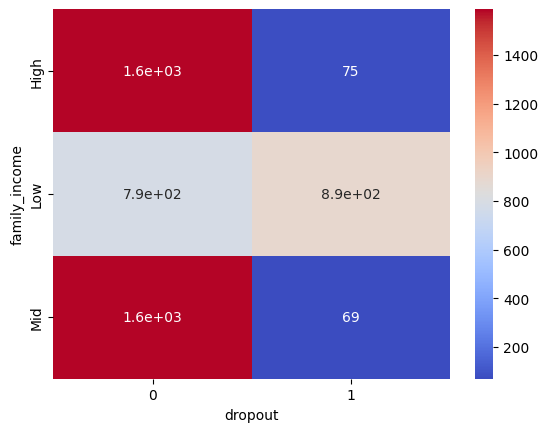

In [324]:
sns.heatmap(pd.crosstab(jee["family_income"],jee["dropout"]), annot=True, cmap='coolwarm')
plt.show()

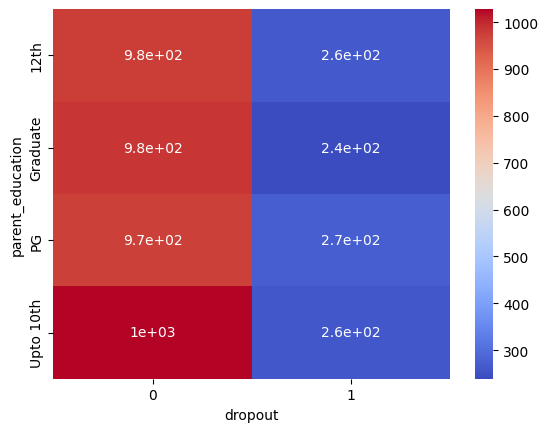

In [325]:
sns.heatmap(pd.crosstab(jee["parent_education"],jee["dropout"]), annot=True, cmap='coolwarm')
plt.show()

In [326]:
jee_t = jee_fe.copy()
jee_t["family_income"] = jee["family_income"]
jee_t["family_income"] = jee_t["family_income"].map({
  "Low":0,
  "Mid":1,
  "High":2
})
jee_t["Income vs Admission"] = jee_family["Income vs Admission"].copy()
jee_t.head()

,mental_health_issues,peer_pressure_level,dropout,peer_focused_mh,mental_health_pp,peer_focused_mh_weighted,mock_main_gap,gap_bin,family_income,Income vs Admission
0,0,0,1,0,0,0,19.09,"(10.0, 20.0]",0,Low_No
1,1,0,0,1,2,2,5.73,"(0.0, 10.0]",1,Mid_No
2,1,1,1,3,3,7,20.24,"(20.0, 30.0]",0,Low_No
3,1,1,0,3,3,7,23.99,"(20.0, 30.0]",0,Low_Yes
4,0,2,0,4,2,10,-13.65,"(-20.0, -10.0]",1,Mid_Yes


In [327]:
for i in ["Yes","No"]:
  x = ((jee[(jee["admission_taken"]==i) & (jee["dropout"]==1)])["dropout"].count()/(jee["dropout"]==1).count())*100
  print(i,"% : ",x)

Yes % :  2.02
No % :  18.7


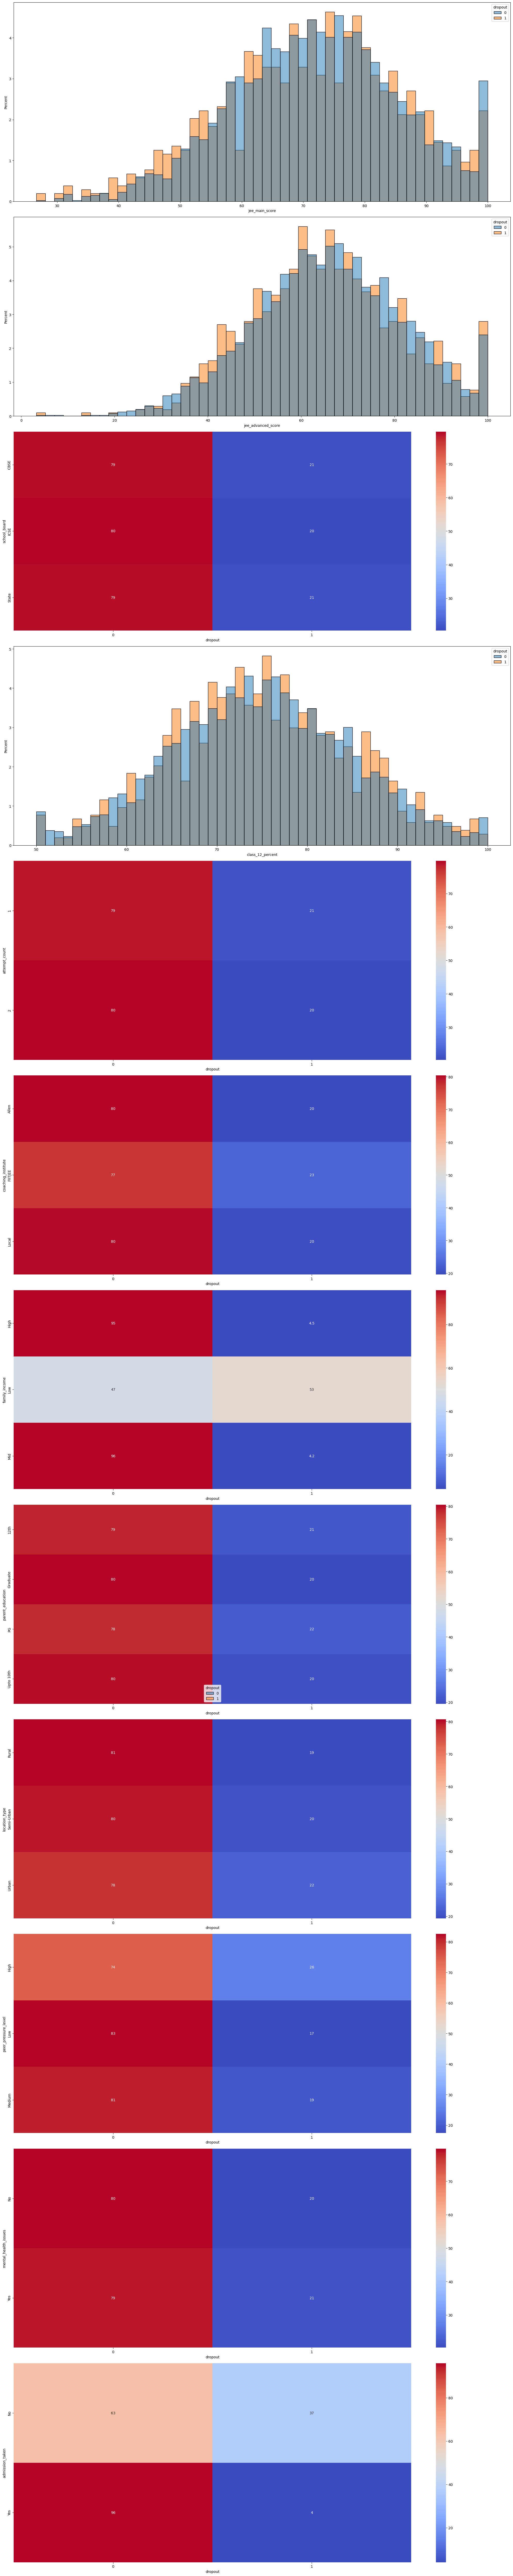

In [328]:
fig, axes = plt.subplots(12,1,figsize=(20,100))
sns.histplot(data=jee, x="jee_main_score", hue="dropout", bins=50, stat='percent',fill=True, common_norm=False, ax=axes[0])
sns.histplot(data=jee, x="jee_advanced_score", hue="dropout", bins=50, stat='percent',fill=True, common_norm=False, ax=axes[1])
sns.heatmap(pd.crosstab(jee["school_board"],jee["dropout"], normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[2])
sns.histplot(data=jee, x="class_12_percent", hue="dropout", bins=50, stat='percent',fill=True, common_norm=False, ax=axes[3])
sns.heatmap(pd.crosstab(jee["attempt_count"],jee["dropout"],normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[4])
sns.heatmap(pd.crosstab(jee["coaching_institute"],jee["dropout"],normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[5])
sns.histplot(data=jee, x="daily_study_hours", hue="dropout", bins=50, stat='percent',fill=True, common_norm=False, ax=axes[7])
sns.heatmap(pd.crosstab(jee["family_income"],jee["dropout"],normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[6])
sns.heatmap(pd.crosstab(jee["parent_education"],jee["dropout"], normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[7])
sns.heatmap(pd.crosstab(jee["location_type"],jee["dropout"],normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[8])
sns.heatmap(pd.crosstab(jee["peer_pressure_level"],jee["dropout"],normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[9])
sns.heatmap(pd.crosstab(jee["mental_health_issues"],jee["dropout"],normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[10])
sns.heatmap(pd.crosstab(jee["admission_taken"],jee["dropout"],normalize='index')*100, annot=True, cmap="coolwarm", ax=axes[11])

plt.tight_layout()
plt.show()


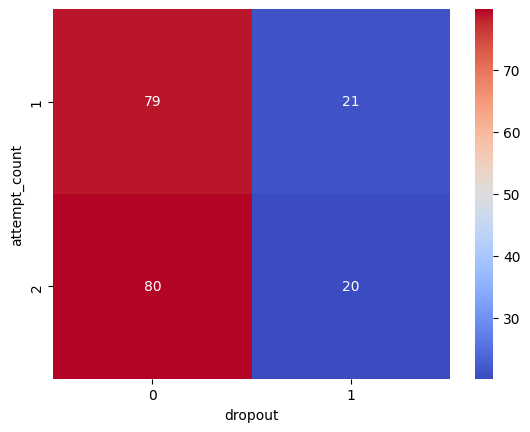

In [329]:
sns.heatmap(pd.crosstab(jee["attempt_count"],jee["dropout"], normalize='index')*100, annot=True, cmap="coolwarm")
plt.show()

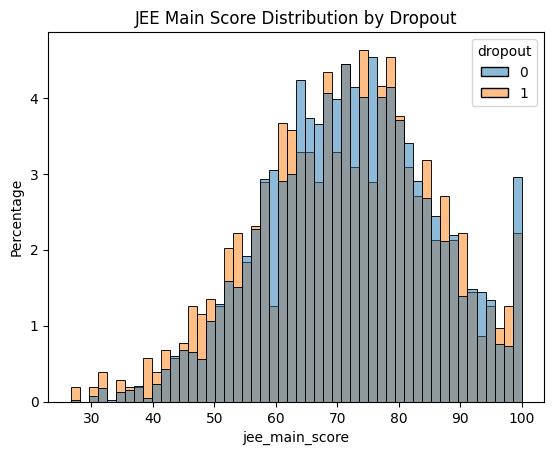

In [330]:
sns.histplot(data=jee, x="jee_main_score", hue="dropout", bins=50, stat='percent',fill=True, common_norm=False)
plt.ylabel("Percentage")  # Not bins
plt.title("JEE Main Score Distribution by Dropout")
plt.show()

In [331]:
for i in ["Low","Mid","High"]:
  x = ((jee[(jee["family_income"]==i) & (jee["dropout"]==1)])["dropout"].count()/(jee["dropout"]==1).count())*100
  print(i,"% : ",x)

Low % :  17.84
Mid % :  1.38
High % :  1.5


In [332]:
for i in ["Upto 10th","12th","Graduate","PG"]:
  x = ((jee[(jee["parent_education"]==i) & (jee["dropout"]==1)])["dropout"].count()/(jee["dropout"]==1).count())*100
  print(i,"% : ",x)

Upto 10th % :  5.2
12th % :  5.3
Graduate % :  4.78
PG % :  5.4399999999999995


<p style="font-size:17px">
Creating <b>filtered_jee</b> to be a dataframe to contain only data of those who dropped out to explore reasons why they mainly dropped out
</p>

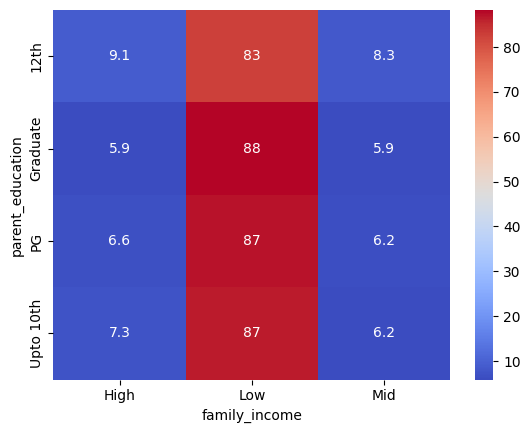

In [333]:
filtered_jee = jee[jee["dropout"] == 1]
sns.heatmap(pd.crosstab(filtered_jee["parent_education"], filtered_jee["family_income"], normalize='index')*100, annot=True, cmap="coolwarm")
plt.show()

<p style="font-size:20px">
The graph reveals that a large majority of dropouts come from families that have low overall income 
</p>

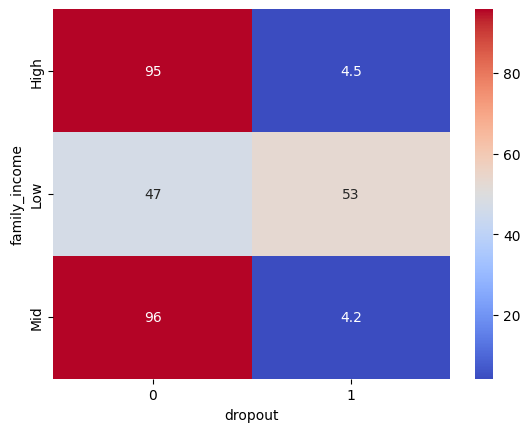

In [334]:
sns.heatmap(pd.crosstab(jee["family_income"],jee["dropout"], normalize='index')*100, annot=True, cmap='coolwarm')
plt.show()

In [335]:
filtered_jee["coaching_institute"].isna().sum()

246

In [336]:
jee_parent = jee[["parent_education","family_income","daily_study_hours","coaching_institute","dropout"]].copy()
jee_parent

,parent_education,family_income,daily_study_hours,coaching_institute,dropout
0,Upto 10th,Low,5.4,FIITJEE,1
1,Upto 10th,Mid,5.5,FIITJEE,0
2,PG,Low,7.0,FIITJEE,1
3,12th,Low,2.1,FIITJEE,0
4,Graduate,Mid,6.3,Allen,0
...,...,...,...,...,...
4995,PG,High,4.7,FIITJEE,0
4996,PG,Mid,4.7,Local,0
4997,PG,Mid,6.3,NaN,0
4998,Upto 10th,High,4.0,Allen,0


In [337]:
jee_parent["coaching_institute"] = jee_parent["coaching_institute"].fillna("Self Study")
jee_parent

,parent_education,family_income,daily_study_hours,coaching_institute,dropout
0,Upto 10th,Low,5.4,FIITJEE,1
1,Upto 10th,Mid,5.5,FIITJEE,0
2,PG,Low,7.0,FIITJEE,1
3,12th,Low,2.1,FIITJEE,0
4,Graduate,Mid,6.3,Allen,0
...,...,...,...,...,...
4995,PG,High,4.7,FIITJEE,0
4996,PG,Mid,4.7,Local,0
4997,PG,Mid,6.3,Self Study,0
4998,Upto 10th,High,4.0,Allen,0


In [338]:
jee_parent["parent_education"].unique().tolist()

['Upto 10th', 'PG', '12th', 'Graduate']

In [339]:
jee_parent["parent_education"] = jee_parent["parent_education"].map({
  'Upto 10th':0,
  "12th":1,
  "Graduate":2,
  'PG':3
})
jee_parent["family_income"] = jee_parent["family_income"].map({
  'Low':0,
  "Mid":1,
  "High":2
})
jee_parent["coaching_institute"] = jee_parent["coaching_institute"].apply(lambda x: "Branded" if x in ["FIITJEE", "Allen"] else x)
jee_parent["coaching_institute"] = jee_parent["coaching_institute"].map({
  "Branded":0,
  "Local":1,
  "Self Study":2
})
jee_parent

,parent_education,family_income,daily_study_hours,coaching_institute,dropout
0,0,0,5.4,0,1
1,0,1,5.5,0,0
2,3,0,7.0,0,1
3,1,0,2.1,0,0
4,2,1,6.3,0,0
...,...,...,...,...,...
4995,3,2,4.7,0,0
4996,3,1,4.7,1,0
4997,3,1,6.3,2,0
4998,0,2,4.0,0,0


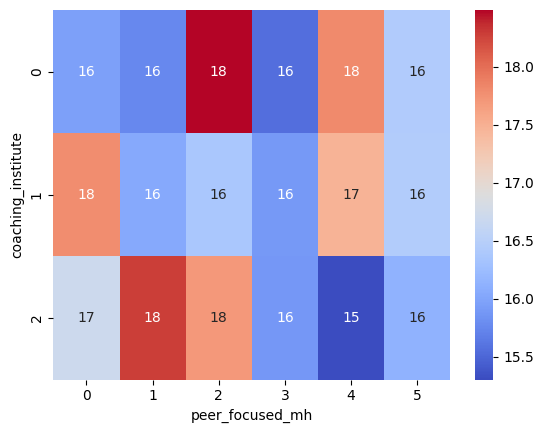

In [340]:
sns.heatmap(pd.crosstab(jee_parent["coaching_institute"],jee_fe["peer_focused_mh"], normalize ='index')*100, annot=True, cmap="coolwarm")
plt.show()

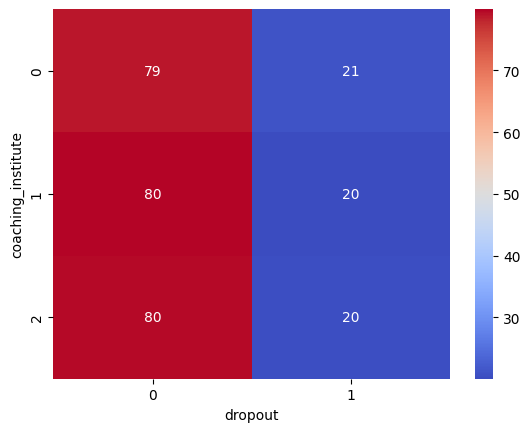

In [341]:
sns.heatmap(pd.crosstab(jee_parent["coaching_institute"],jee_parent["dropout"], normalize='index')*100, annot=True, cmap="coolwarm")
plt.show()

In [342]:
jee_parent["admission_taken"] = jee_family["admission_taken"].copy()
jee_parent.head()

,parent_education,family_income,daily_study_hours,coaching_institute,dropout,admission_taken
0,0,0,5.4,0,1,0
1,0,1,5.5,0,0,0
2,3,0,7.0,0,1,0
3,1,0,2.1,0,0,1
4,2,1,6.3,0,0,1


In [379]:
jee_parent["parental_support"] = 0.30*jee_parent["daily_study_hours"] + 0.20*jee_parent["parent_education"] + 0.05*jee_parent["coaching_institute"]
jee_parent[["parental_support","dropout"]].sample(7)

,parental_support,dropout
2032,1.23,0
2699,1.61,0
643,0.88,1
3012,1.72,0
2893,1.90,0
3963,2.43,1
2187,1.77,1


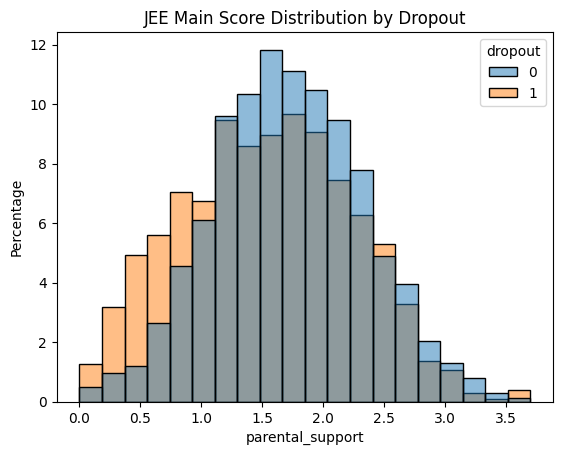

In [344]:
sns.histplot(data=jee_parent, x="parental_support", hue="dropout", bins=20, stat='percent',fill=True, common_norm=False)
plt.ylabel("Percentage")  # Not bins
plt.title("JEE Main Score Distribution by Dropout")
plt.show()

In [345]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

features = ["parental_support"]
target = "dropout"

X= jee_parent[features]
Y= jee_parent[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       804
           1       0.52      0.08      0.14       196

    accuracy                           0.81      1000
   macro avg       0.67      0.53      0.52      1000
weighted avg       0.76      0.81      0.74      1000



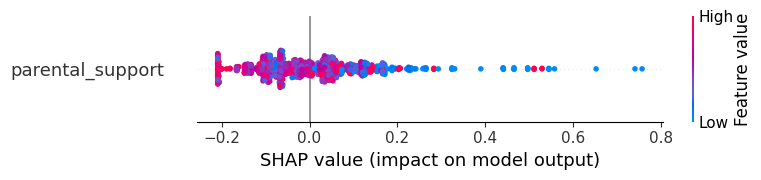

In [346]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)  # shape: (2, 1000, 2)

# If shap_values is a list (old format)
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)  # class=1 → dropout
else:
    shap.summary_plot(shap_values[..., 1], X_test)  # class=1 last axis

In [347]:
jee_test = pd.concat([jee_parent[["family_income","daily_study_hours","parental_support",]],jee_family[["Income vs Admission","admission_taken"]],jee_fe[["peer_pressure_level","peer_focused_mh","mental_health_pp","mock_main_gap","gap_bin","dropout"]]], axis=1)
jee_test["Income vs Admission"] = jee_test["Income vs Admission"].map({
  "Low_No":0,
  "Mid_No":1,
  "High_No":2,
  "Low_Yes":3,
  "Mid_Yes":4,
  "High_Yes":5
})
jee_test['gap_bin'] = jee_test["gap_bin"][0]
jee_test.head()

,family_income,daily_study_hours,parental_support,Income vs Admission,admission_taken,peer_pressure_level,peer_focused_mh,mental_health_pp,mock_main_gap,gap_bin,dropout
0,0,5.4,1.62,0,0,0,0,0,19.09,"(10.0, 20.0]",1
1,1,5.5,1.65,1,0,0,1,2,5.73,"(10.0, 20.0]",0
2,0,7.0,2.70,0,0,1,3,3,20.24,"(10.0, 20.0]",1
3,0,2.1,0.83,3,1,1,3,3,23.99,"(10.0, 20.0]",0
4,1,6.3,2.29,4,1,2,4,2,-13.65,"(10.0, 20.0]",0


In [348]:
jee_test["coaching_institute"] = jee_parent[["coaching_institute"]].copy()
jee_test["location_type"] = jee_family["location_type"].copy()
jee_test["mental_health_issues"] = jee_fe["mental_health_issues"]
jee_test.head()

,family_income,daily_study_hours,parental_support,Income vs Admission,admission_taken,peer_pressure_level,peer_focused_mh,mental_health_pp,mock_main_gap,gap_bin,dropout,coaching_institute,location_type,mental_health_issues
0,0,5.4,1.62,0,0,0,0,0,19.09,"(10.0, 20.0]",1,0,2,0
1,1,5.5,1.65,1,0,0,1,2,5.73,"(10.0, 20.0]",0,0,2,1
2,0,7.0,2.70,0,0,1,3,3,20.24,"(10.0, 20.0]",1,0,1,1
3,0,2.1,0.83,3,1,1,3,3,23.99,"(10.0, 20.0]",0,0,1,1
4,1,6.3,2.29,4,1,2,4,2,-13.65,"(10.0, 20.0]",0,0,1,0


### Temporary Model Testing to find which feature work and which don't

In [349]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

features = ["peer_focused_mh","daily_study_hours","parental_support","location_type"]
target = "dropout"

X= jee_test[features]
Y= jee_test[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = RandomForestClassifier(class_weight='balanced',random_state=42)


In [350]:
jee[jee["dropout"]==1]["dropout"].count()

1036

In [351]:
print("Features being used:", X.columns.tolist())
print(X.head())

Features being used: ['peer_focused_mh', 'daily_study_hours', 'parental_support', 'location_type']
   peer_focused_mh  daily_study_hours  parental_support  location_type
0                0                5.4              1.62              2
1                1                5.5              1.65              2
2                3                7.0              2.70              1
3                3                2.1              0.83              1
4                4                6.3              2.29              1


In [352]:
model.fit(X_train, Y_train)
probs = model.predict_proba(X_test)[:, 1]
y_pred_custom = (probs > 0.27).astype(int)  # Try 0.6 or 0.65
print("Before tweaking the probabilities : \n",classification_report(Y_test, y_pred))
print("Sample predictions:", y_pred[:10])
print("After tweaking the probabilities :\n",classification_report(Y_test, y_pred_custom))

Before tweaking the probabilities : 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       804
           1       0.52      0.08      0.14       196

    accuracy                           0.81      1000
   macro avg       0.67      0.53      0.52      1000
weighted avg       0.76      0.81      0.74      1000

Sample predictions: [0 0 0 0 0 0 0 1 0 0]
After tweaking the probabilities :
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       804
           1       0.25      0.33      0.29       196

    accuracy                           0.68      1000
   macro avg       0.54      0.55      0.54      1000
weighted avg       0.71      0.68      0.69      1000



<p style="font-size:17px">
Even after tweaking with the probabilties and the threshold, it seems we cannot go past a "decent" score. 
</p>

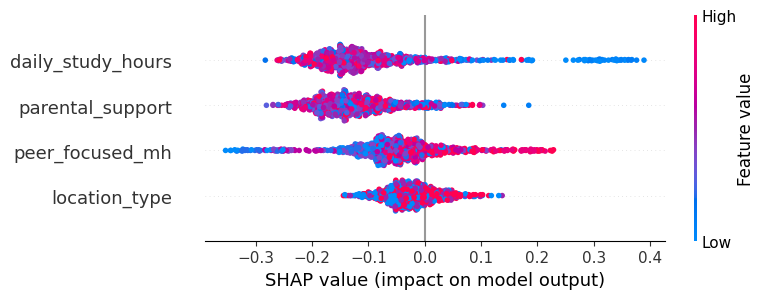

In [353]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test) 

if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)  # if model is a binary classification
else:
    shap.summary_plot(shap_values[..., 1], X_test)  # if model is not a binary classification

In [354]:
jee_test.drop("gap_bin",axis=1)

,family_income,daily_study_hours,parental_support,Income vs Admission,admission_taken,peer_pressure_level,peer_focused_mh,mental_health_pp,mock_main_gap,dropout,coaching_institute,location_type,mental_health_issues
0,0,5.4,1.62,0,0,0,0,0,19.09,1,0,2,0
1,1,5.5,1.65,1,0,0,1,2,5.73,0,0,2,1
2,0,7.0,2.70,0,0,1,3,3,20.24,1,0,1,1
3,0,2.1,0.83,3,1,1,3,3,23.99,0,0,1,1
4,1,6.3,2.29,4,1,2,4,2,-13.65,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,4.7,2.01,5,1,2,5,4,14.23,0,0,1,1
4996,1,4.7,2.06,4,1,2,5,4,-0.89,0,1,2,1
4997,1,6.3,2.59,4,1,1,3,3,16.25,0,2,1,1
4998,2,4.0,1.20,5,1,0,0,0,25.92,0,0,2,0


In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
X = jee_test[["family_income","peer_focused_mh","parental_support","mock_main_gap"]]
y = jee_test["dropout"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [356]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [357]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.81      0.89       804
           1       0.54      0.91      0.68       196

    accuracy                           0.83      1000
   macro avg       0.76      0.86      0.78      1000
weighted avg       0.89      0.83      0.85      1000

[[653 151]
 [ 17 179]]


<p style="font-size:20px">
The model even though is encompassing a lot of features it thinks are "at risk", almost half of the features are actually <b>NON-DROPOUTS</b>
</p>

In [358]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
print(scores.mean())

0.7614935389203501


## Final Model Testing

🎯 Threshold = 0.4

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       793
           1       1.00      0.98      0.99       207

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000



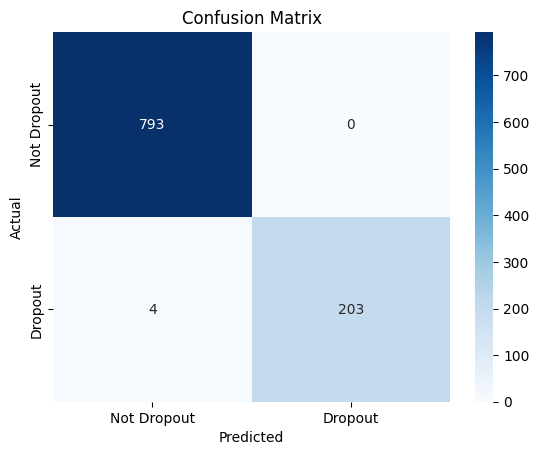

In [359]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Split the data
X = jee_test.drop(columns=["dropout","gap_bin"])
y = jee_test["dropout"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2. Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# 3. Train model with balanced class weight
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_res, y_res)

# 4. Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# 5. Tune threshold
threshold = 0.4  # You can experiment with 0.35, 0.5, etc.
y_pred = (y_probs > threshold).astype(int)

# 6. Print results
print("🎯 Threshold =", threshold)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 7. Optional: Confusion matrix
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Dropout", "Dropout"], yticklabels=["Not Dropout", "Dropout"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [382]:
jee_test["PSxIA"] = jee_test["parental_support"] * jee_test["Income vs Admission"]
jee_test["PS+IA"] = jee_test["parental_support"] + jee_test["Income vs Admission"]
jee_test.head()

,family_income,daily_study_hours,parental_support,Income vs Admission,admission_taken,peer_pressure_level,peer_focused_mh,mental_health_pp,mock_main_gap,gap_bin,dropout,coaching_institute,location_type,mental_health_issues,PSxIA,PS+IA
0,0,5.4,1.62,0,0,0,0,0,19.09,"(10.0, 20.0]",1,0,2,0,0.00,1.62
1,1,5.5,1.65,1,0,0,1,2,5.73,"(10.0, 20.0]",0,0,2,1,1.65,2.65
2,0,7.0,2.70,0,0,1,3,3,20.24,"(10.0, 20.0]",1,0,1,1,0.00,2.70
3,0,2.1,0.83,3,1,1,3,3,23.99,"(10.0, 20.0]",0,0,1,1,2.49,3.83
4,1,6.3,2.29,4,1,2,4,2,-13.65,"(10.0, 20.0]",0,0,1,0,9.16,6.29


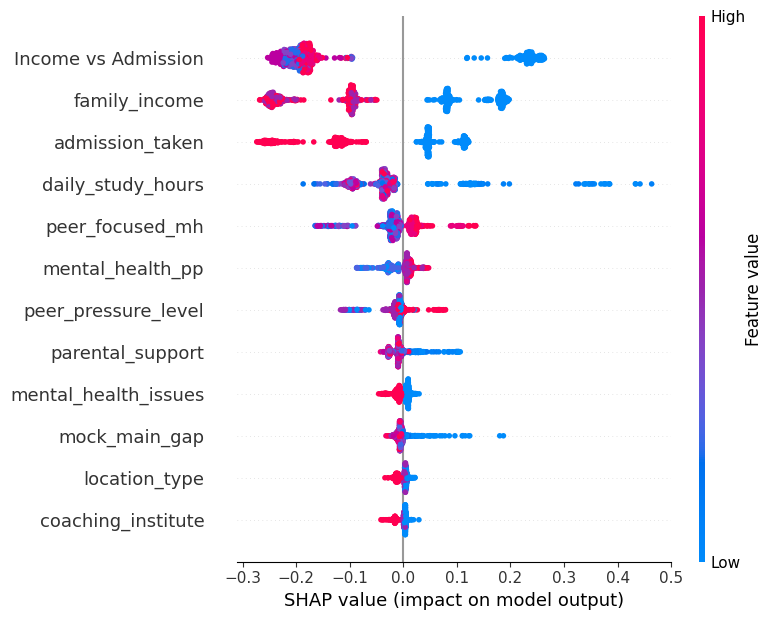

In [361]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test) 

if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)  # if model is a binary classification
else:
    shap.summary_plot(shap_values[..., 1], X_test)  # if model is not a binary classification

<p style="font-size: 20px">
The model has near-perfect scores due to the inclusion of <b>admission_taken</b> due to its highly polarising data that the model can "mistake" as a crucial feature to distinguish dropouts and non-dropouts if <b>SMOTE</b> was not used.<br>
Therefore, another model is to be testd finally without "admission_taken"
</p>

In [385]:
jee_test

,family_income,daily_study_hours,parental_support,Income vs Admission,admission_taken,peer_pressure_level,peer_focused_mh,mental_health_pp,mock_main_gap,gap_bin,dropout,coaching_institute,location_type,mental_health_issues,PSxIA,PS+IA
0,0,5.4,1.62,0,0,0,0,0,19.09,"(10.0, 20.0]",1,0,2,0,0.00,1.62
1,1,5.5,1.65,1,0,0,1,2,5.73,"(10.0, 20.0]",0,0,2,1,1.65,2.65
2,0,7.0,2.70,0,0,1,3,3,20.24,"(10.0, 20.0]",1,0,1,1,0.00,2.70
3,0,2.1,0.83,3,1,1,3,3,23.99,"(10.0, 20.0]",0,0,1,1,2.49,3.83
4,1,6.3,2.29,4,1,2,4,2,-13.65,"(10.0, 20.0]",0,0,1,0,9.16,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,4.7,2.01,5,1,2,5,4,14.23,"(10.0, 20.0]",0,0,1,1,10.05,7.01
4996,1,4.7,2.06,4,1,2,5,4,-0.89,"(10.0, 20.0]",0,1,2,1,8.24,6.06
4997,1,6.3,2.59,4,1,1,3,3,16.25,"(10.0, 20.0]",0,2,1,1,10.36,6.59
4998,2,4.0,1.20,5,1,0,0,0,25.92,"(10.0, 20.0]",0,0,2,0,6.00,6.20


🎯 Threshold = 0.56

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       793
           1       0.99      0.98      0.98       207

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



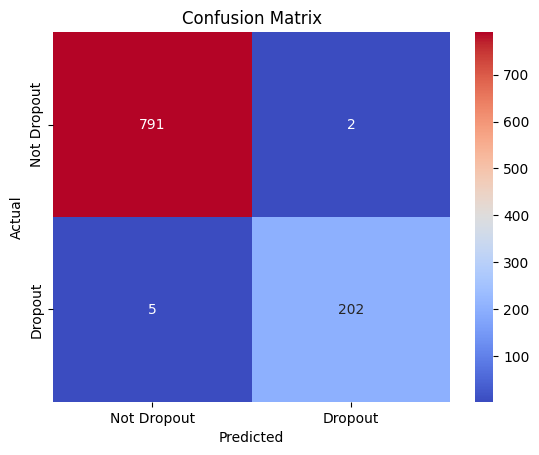

In [448]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Split the data
X = jee_test[["PSxIA","peer_focused_mh","location_type","daily_study_hours"]]
y = jee_test["dropout"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 2. Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# 3. Train model with balanced class weight
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_res, y_res)

# 4. Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# 5. Tune threshold
threshold = 0.56  # You can experiment with 0.35, 0.5, etc.
y_pred = (y_probs > threshold).astype(int)

# 6. Print results
print("🎯 Threshold =", threshold)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 7. Optional: Confusion matrix
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Not Dropout", "Dropout"], yticklabels=["Not Dropout", "Dropout"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


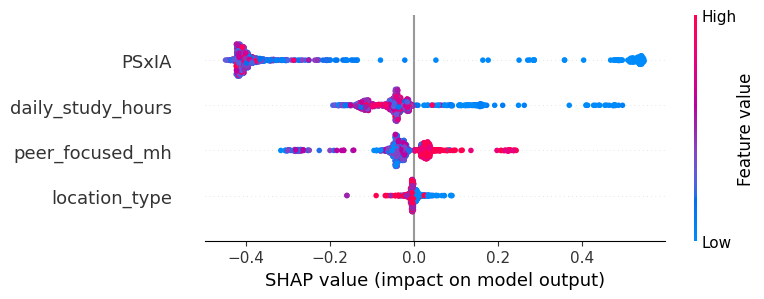

In [449]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test) 

if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test)  # if model is a binary classification
else:
    shap.summary_plot(shap_values[..., 1], X_test)  # if model is not a binary classification

In [447]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.2f}")

Optimal threshold: 0.56


In [450]:
from sklearn.metrics import f1_score

# Fit on SMOTE'd training set
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_res, y_res)

# Train score
train_preds = model.predict(X_res)
train_f1 = f1_score(y_res, train_preds)

# Test score
test_preds = model.predict(X_test)
test_f1 = f1_score(y_test, test_preds)

print(f"🏋️‍♂️ Train F1 Score: {train_f1:.3f}")
print(f"🧪 Test F1 Score: {test_f1:.3f}")


🏋️‍♂️ Train F1 Score: 1.000
🧪 Test F1 Score: 0.983


In [451]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Create a pipeline with SMOTE and classifier
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Stratified K-Fold for class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')  # or 'roc_auc', 'accuracy', etc.

print("💥 Cross-Validation F1 Scores:", scores)
print("📊 Mean F1 Score:", np.mean(scores))
print("📉 Std Dev:", np.std(scores))


💥 Cross-Validation F1 Scores: [0.9804878  0.98536585 0.98543689 0.98296837 0.99277108]
📊 Mean F1 Score: 0.9854060011815005
📉 Std Dev: 0.004107985333952949


# In short,
<p style="font-size: 20px">
These are the columns that will be added to the featured-engineered dataframe:
<ul>
<li>peer_focused_mh</li>
<li>PSxIA</li>
<li>daily_study_hours</li>
<li>location_type</li>
</p>

In [460]:
jee_test

,family_income,daily_study_hours,parental_support,Income vs Admission,admission_taken,peer_pressure_level,peer_focused_mh,mental_health_pp,mock_main_gap,gap_bin,dropout,coaching_institute,location_type,mental_health_issues,PSxIA,PS+IA
0,0,5.4,1.62,0,0,0,0,0,19.09,"(10.0, 20.0]",1,0,2,0,0.00,1.62
1,1,5.5,1.65,1,0,0,1,2,5.73,"(10.0, 20.0]",0,0,2,1,1.65,2.65
2,0,7.0,2.70,0,0,1,3,3,20.24,"(10.0, 20.0]",1,0,1,1,0.00,2.70
3,0,2.1,0.83,3,1,1,3,3,23.99,"(10.0, 20.0]",0,0,1,1,2.49,3.83
4,1,6.3,2.29,4,1,2,4,2,-13.65,"(10.0, 20.0]",0,0,1,0,9.16,6.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,4.7,2.01,5,1,2,5,4,14.23,"(10.0, 20.0]",0,0,1,1,10.05,7.01
4996,1,4.7,2.06,4,1,2,5,4,-0.89,"(10.0, 20.0]",0,1,2,1,8.24,6.06
4997,1,6.3,2.59,4,1,1,3,3,16.25,"(10.0, 20.0]",0,2,1,1,10.36,6.59
4998,2,4.0,1.20,5,1,0,0,0,25.92,"(10.0, 20.0]",0,0,2,0,6.00,6.20


In [461]:
jee_final= jee_test[["peer_focused_mh","PSxIA","daily_study_hours","location_type","Income vs Admission","family_income","parental_support","dropout"]].copy()
jee_final.head()

,peer_focused_mh,PSxIA,daily_study_hours,location_type,Income vs Admission,family_income,parental_support,dropout
0,0,0.00,5.4,2,0,0,1.62,1
1,1,1.65,5.5,2,1,1,1.65,0
2,3,0.00,7.0,1,0,0,2.70,1
3,3,2.49,2.1,1,3,0,0.83,0
4,4,9.16,6.3,1,4,1,2.29,0


In [462]:
jee_final.to_csv("../Data/Feature_Engineered.csv",index=False)